#SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize period)

In [1]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [2]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# set size of inline plots
matplotlib.rcParams['figure.figsize'] = [14, 10]

Some global data

In [4]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define the periods

In [5]:
periods = range(50, 525, 25)
periods = [str(period) for period in periods]

Run Strategy

In [6]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, sma_period=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
annual_return_rate,6.26,6.39,6.12,6.63,6.87,7.31,7.18,7.53,7.34,7.01,6.75,6.92,6.79,6.99,6.67,6.11,5.79,5.88,5.59
max_closed_out_drawdown,-39.52,-37.82,-50.60,-45.23,-38.18,-32.79,-28.26,-25.25,-21.64,-23.85,-35.43,-35.66,-36.46,-35.37,-36.47,-39.90,-43.89,-43.38,-42.93
drawdown_annualized_return,-6.32,-5.91,-8.27,-6.82,-5.56,-4.49,-3.93,-3.36,-2.95,-3.40,-5.25,-5.15,-5.37,-5.06,-5.46,-6.53,-7.58,-7.38,-7.67
drawdown_recovery,-9.88,-3.91,-3.93,-3.75,-3.75,-3.75,-3.76,-1.02,-0.30,-0.21,-1.24,-1.22,-1.27,-1.31,-1.36,-1.36,-1.36,-1.36,-1.36
best_month,15.18,15.17,15.18,14.93,14.92,14.92,13.42,13.41,13.40,13.40,13.40,14.53,14.54,14.55,15.87,15.87,18.16,18.15,18.16
worst_month,-15.40,-12.67,-12.69,-12.68,-12.11,-11.35,-11.96,-15.03,-14.22,-14.55,-31.46,-31.46,-31.45,-31.45,-31.45,-31.47,-31.44,-31.46,-31.42
sharpe_ratio,0.68,0.69,0.65,0.70,0.72,0.75,0.74,0.76,0.74,0.70,0.66,0.67,0.66,0.67,0.64,0.59,0.56,0.57,0.54
sortino_ratio,0.73,0.75,0.71,0.78,0.80,0.85,0.84,0.88,0.85,0.81,0.71,0.73,0.71,0.73,0.71,0.65,0.61,0.62,0.60
monthly_std,2.79,2.82,2.87,2.89,2.91,2.87,2.88,2.93,2.96,3.00,3.16,3.14,3.16,3.16,3.15,3.20,3.26,3.28,3.31
pct_time_in_market,66.86,68.19,68.93,69.77,70.38,70.89,71.77,72.63,73.22,73.77,74.23,74.60,75.03,75.58,76.21,76.76,77.22,77.76,78.29


Bar graphs

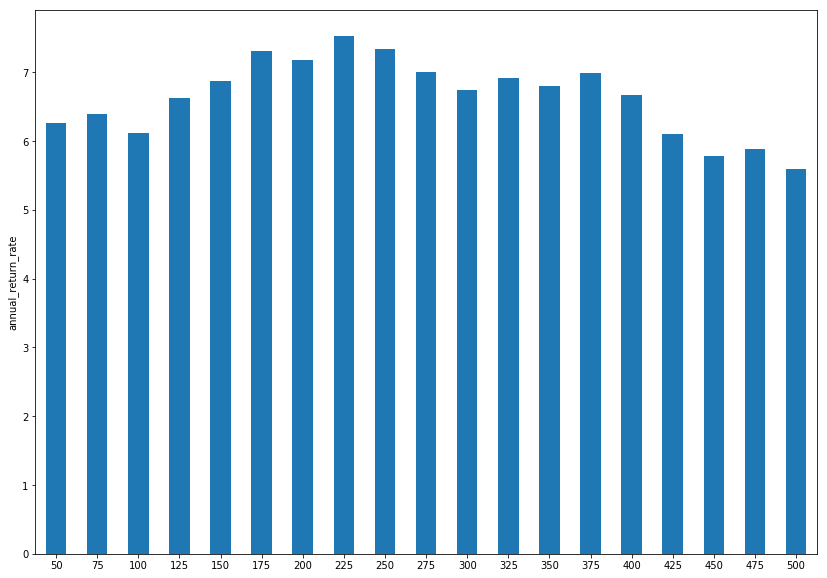

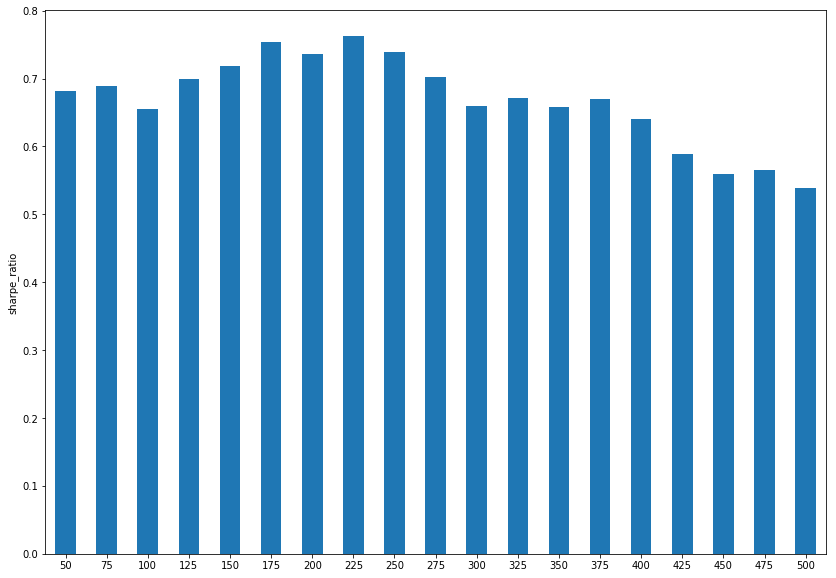

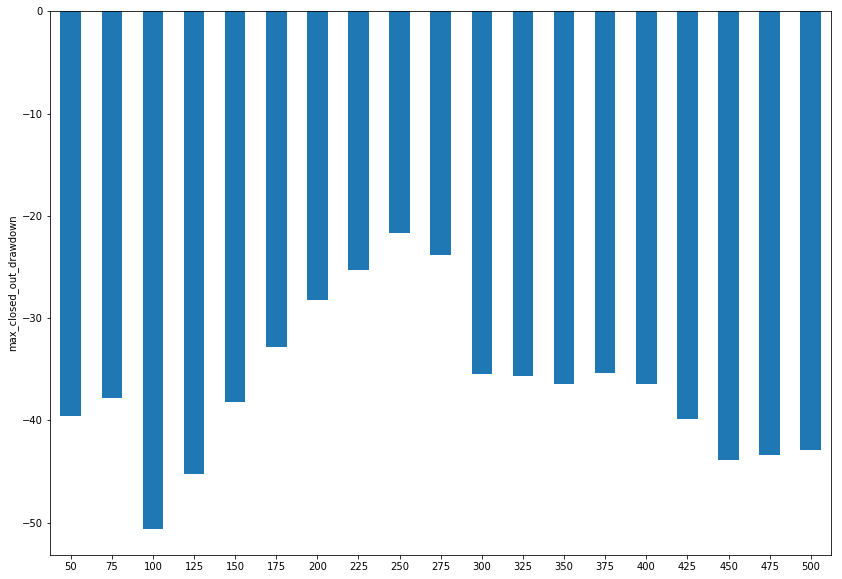

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-03-15 00:00:00 BUY  573 ^GSPC @ 17.45
2019-05-15 00:00:00 SELL 573 ^GSPC @ 2850.96


Equity curve

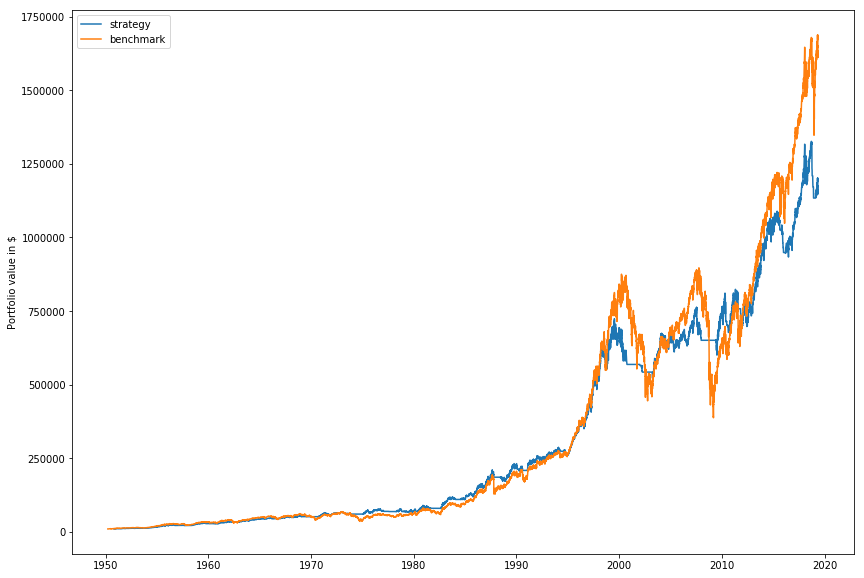

In [10]:
pf.plot_equity_curve(strategies['200'].dbal, benchmark=benchmark.dbal)